In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_excel('C:\\Users\\jatin\Desktop\\machine Learning project\\1645792390_cep1_dataset.xlsx')

print('data imported')

data imported


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.duplicated().sum()


1

In [6]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Reason being here even 0 is capturing the essesnce of the data

In [7]:
#df = df.replace(0, pd.np.nan)


In [52]:
print("shape of the dataset:",df.shape)

shape of the dataset: (303, 14)


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


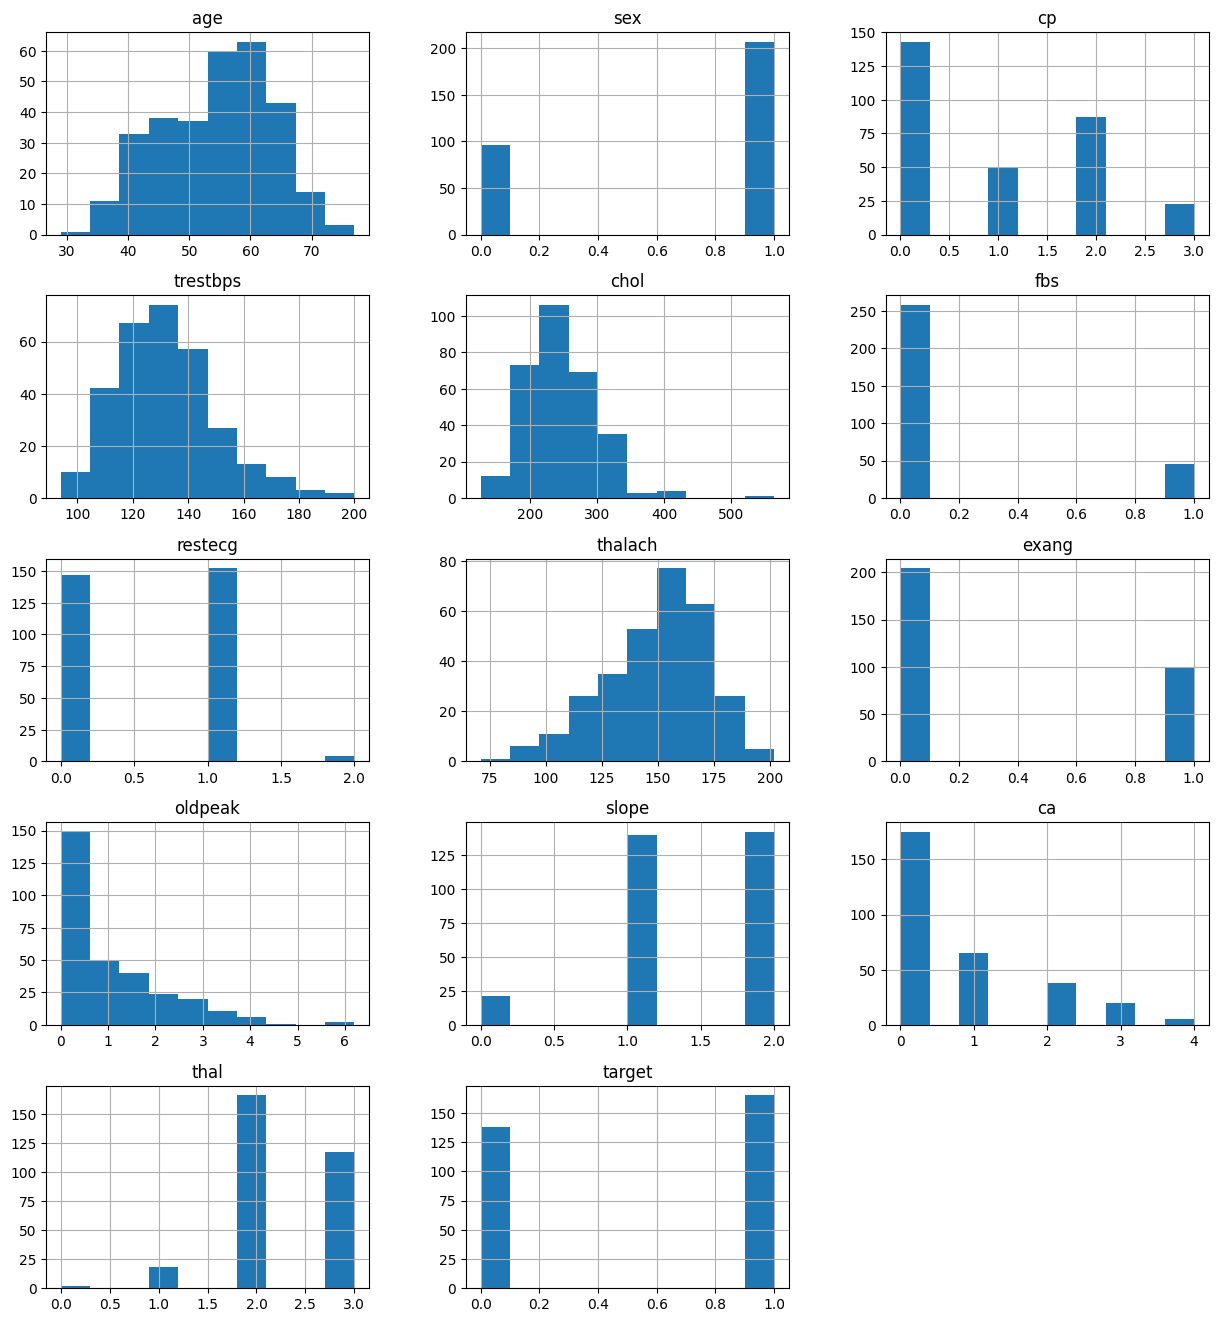

In [14]:
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

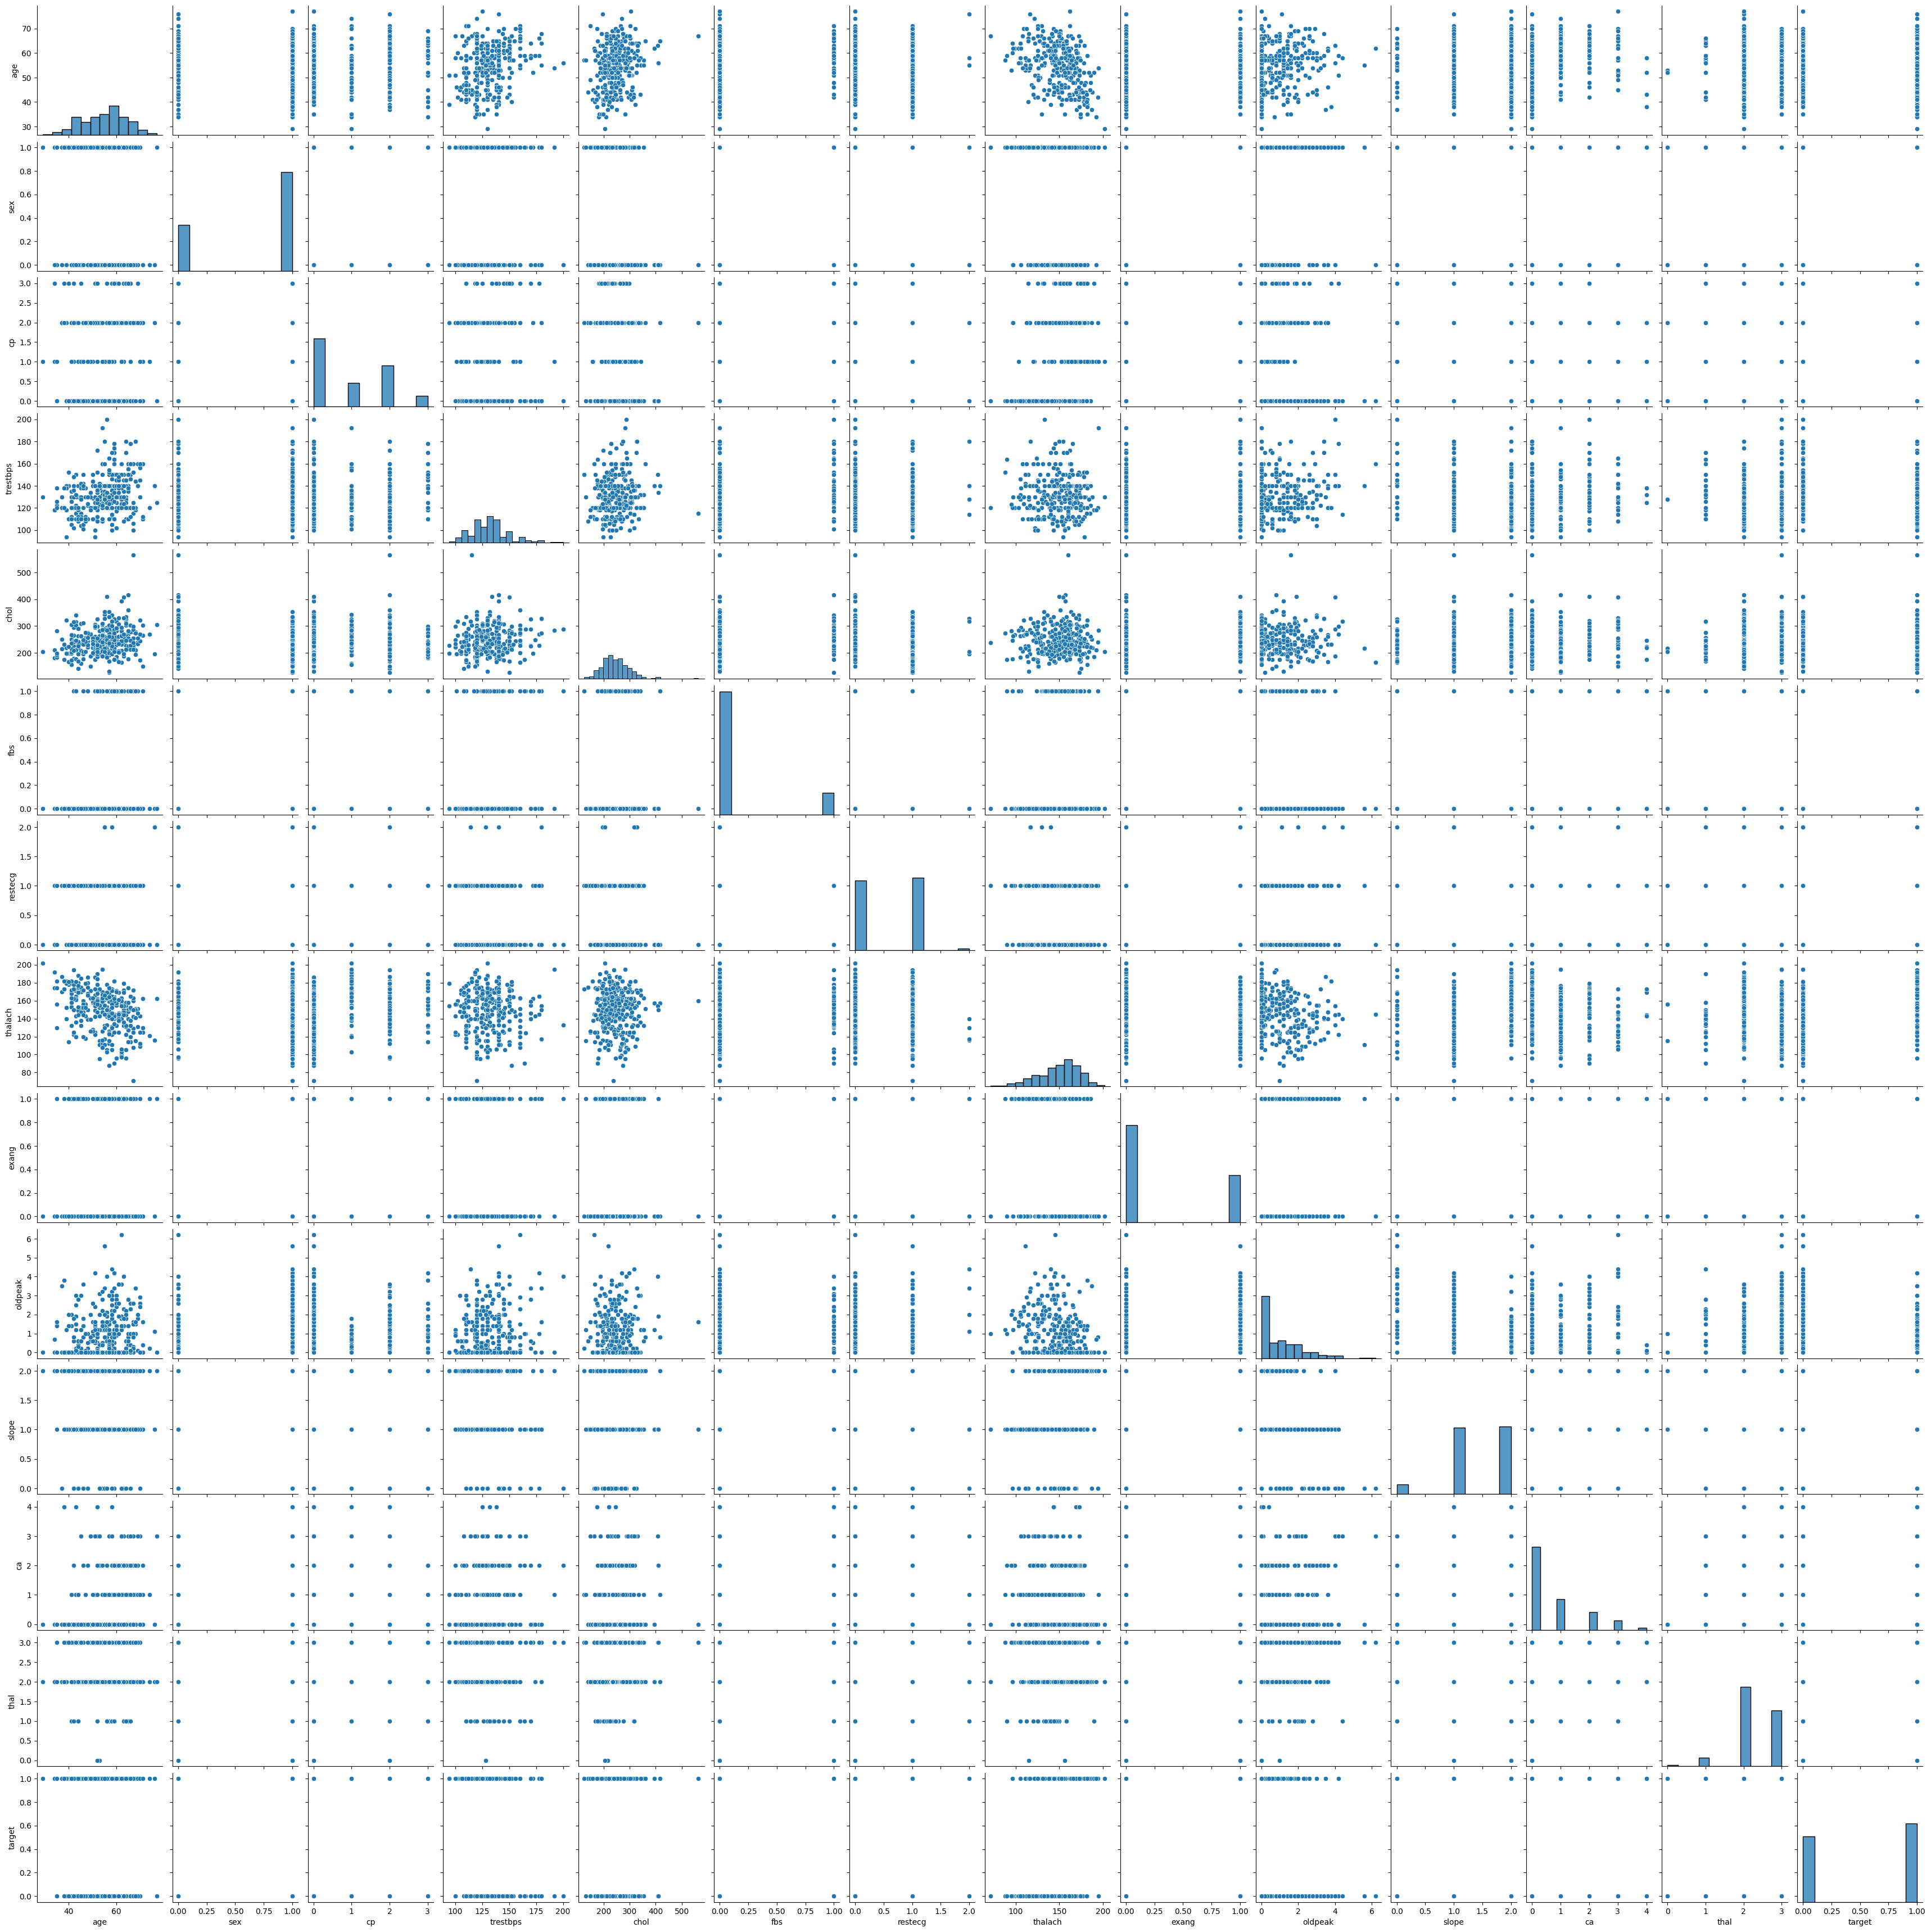

In [15]:
sns.pairplot(df)

<AxesSubplot: >

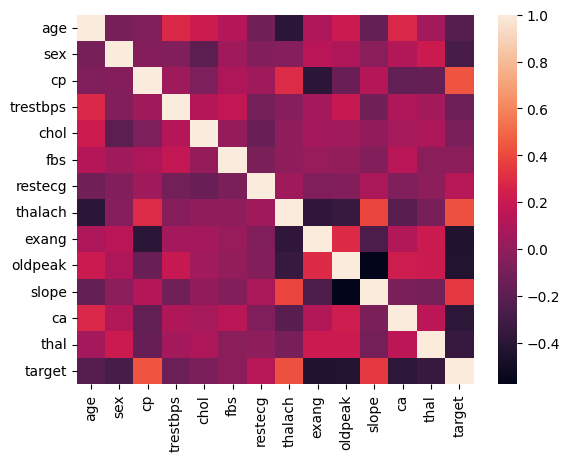

In [16]:
sns.heatmap(df.corr())


Text(0.5, 1.0, ' Sex Vartion over cholesterol that translates to HeartAttack ')

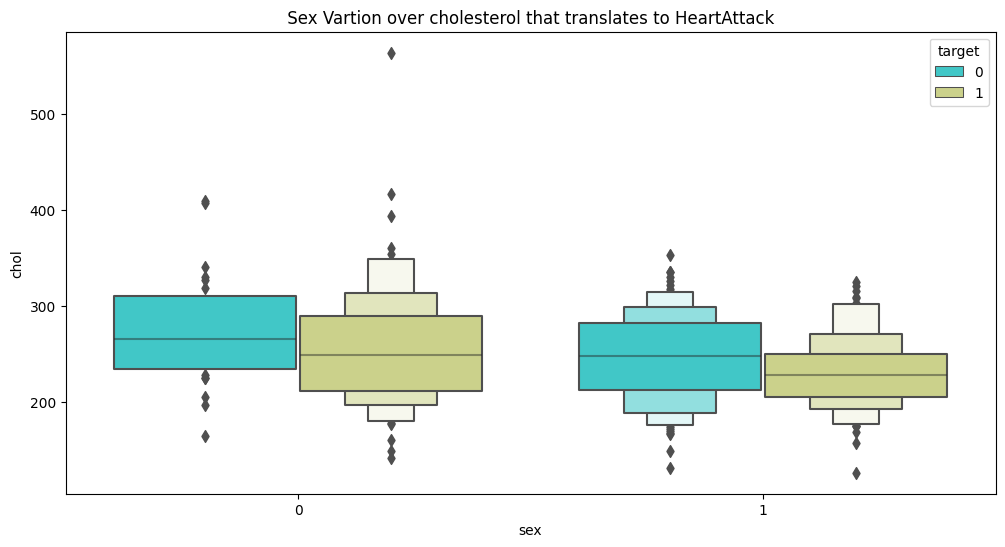

In [42]:
plt.figure(figsize=(12,6))

sns.boxenplot(x='sex',y='chol',data=df, palette='rainbow', hue='target')

plt.title(" Sex Vartion over cholesterol that translates to HeartAttack ")

Text(0.5, 1.0, ' Sex Vartion over age that translates to HeartAttack  ')

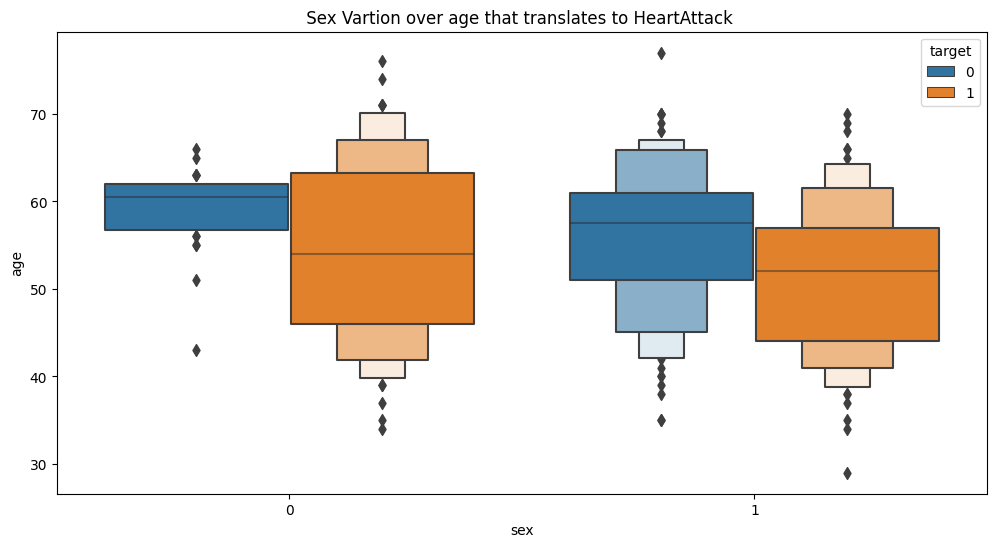

In [43]:
plt.figure(figsize=(12,6))

sns.boxenplot(x='sex',y='age',data=df, hue='target')

plt.title(" Sex Vartion over age that translates to HeartAttack  ")

Text(0.5, 1.0, 'Chest pain type Vartion over Resting blood pressure that translates to HeartAttack ')

<Figure size 1200x600 with 0 Axes>

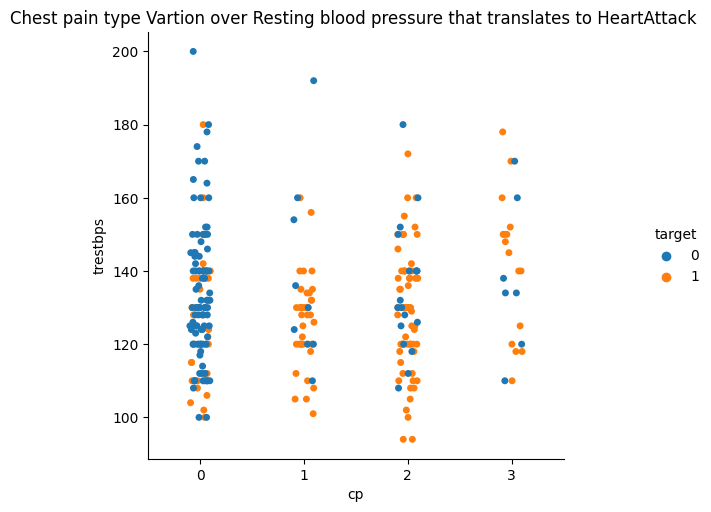

In [44]:
plt.figure(figsize=(12,6))

sns.catplot(x='cp',y='trestbps',data=df, hue='target')

plt.title("Chest pain type Vartion over Resting blood pressure that translates to HeartAttack ")

Text(0.5, 1.0, ' Exercise induced angina with Vartion over Resting blood pressure that translates to HeartAttack ')

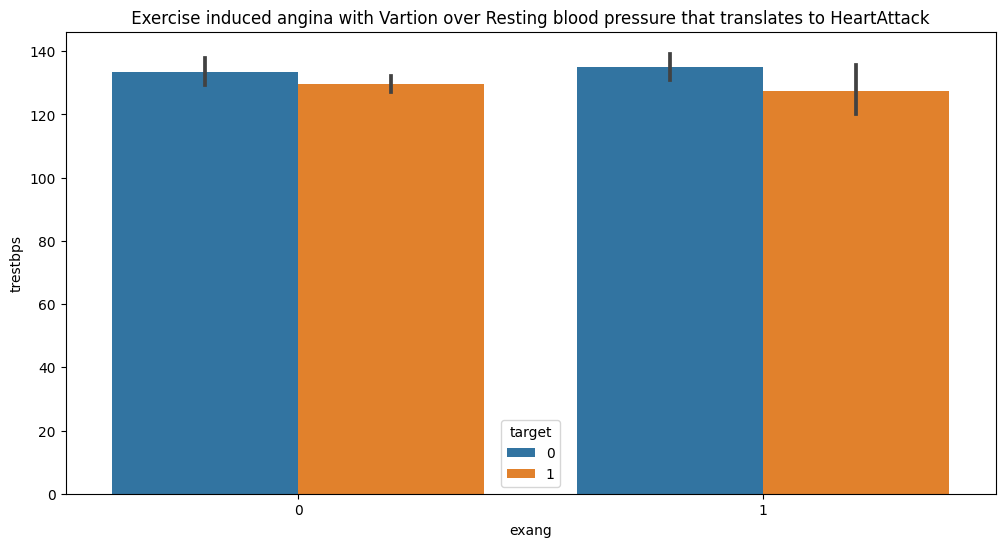

In [45]:
plt.figure(figsize=(12,6))

sns.barplot(x='exang',y='trestbps',data=df, hue='target')

plt.title(" Exercise induced angina with Vartion over Resting blood pressure that translates to HeartAttack ")

Text(0.5, 1.0, 'Exercise induced angina with Vartion over Maximum heart rate achieved that translates to HeartAttack  ')

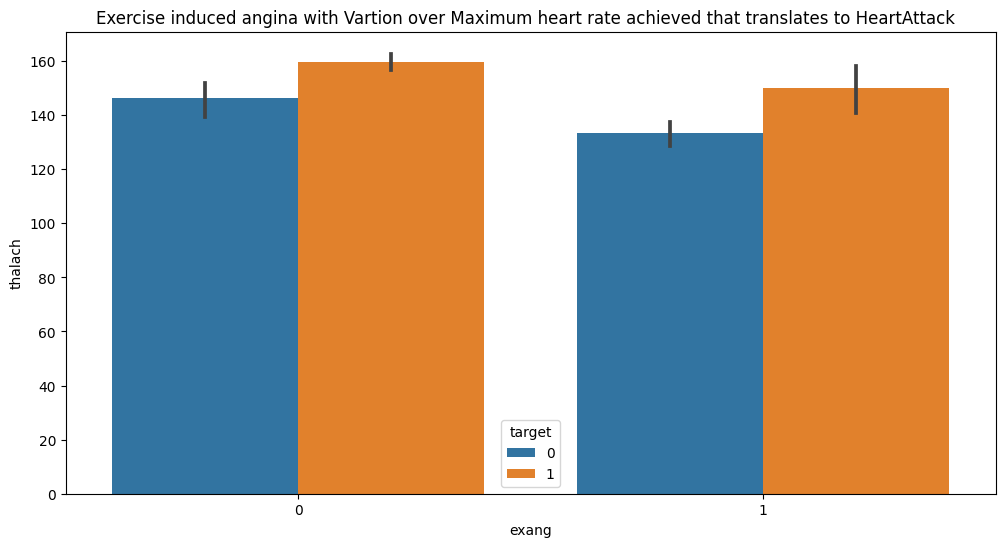

In [46]:
plt.figure(figsize=(12,6))

sns.barplot(x='exang',y='thalach',data=df, hue='target')

plt.title("Exercise induced angina with Vartion over Maximum heart rate achieved that translates to HeartAttack  ")

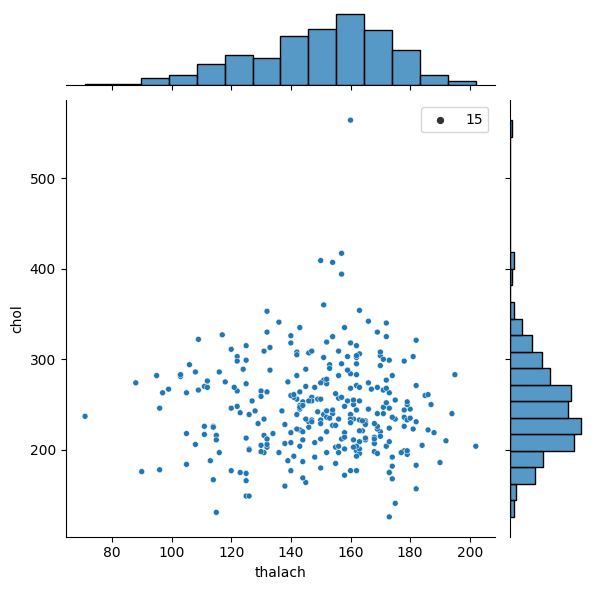

In [49]:
sns.jointplot(x="thalach", y="chol", data=df, size=15)


Text(0.5, 1.0, ' Spread between Maximum heart rate hit leading to heart attack  ')

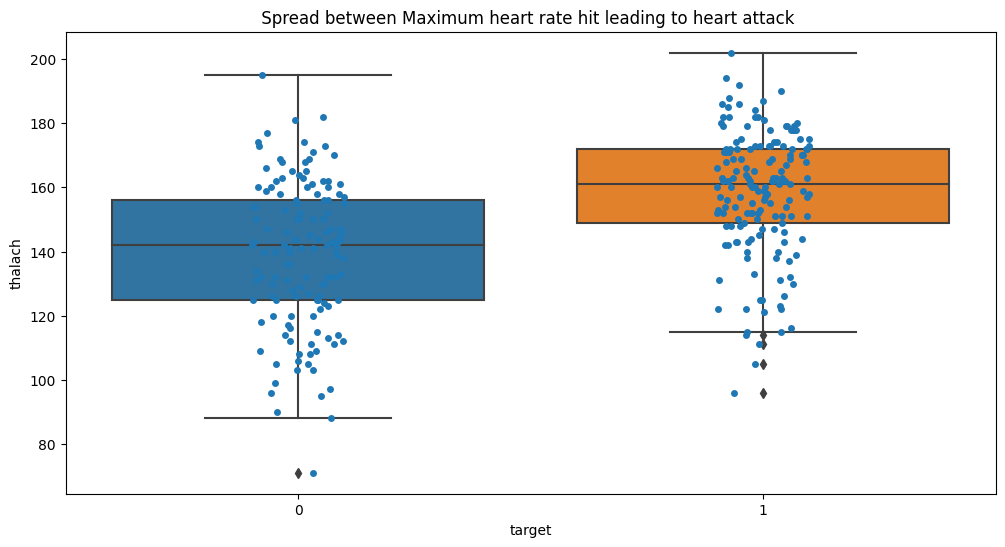

In [50]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="target", y="thalach", data=df)
ax = sns.stripplot(x="target", y="thalach", data=df, jitter=True, edgecolor="gray")
plt.title(" Spread between Maximum heart rate hit leading to heart attack  ")

Text(0.5, 1.0, ' Spread between cholesterol leading to heart attack  ')

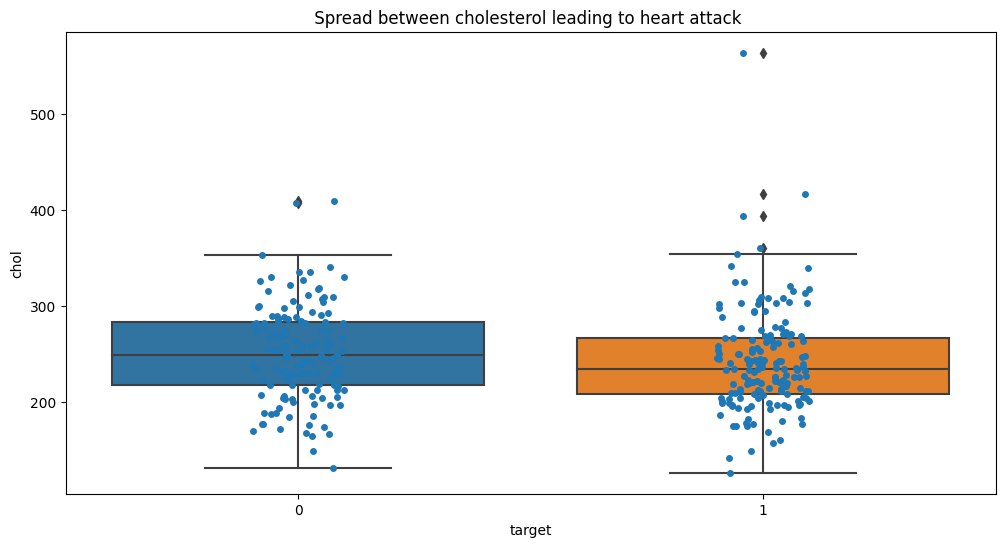

In [51]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="target", y="chol", data=df)
ax = sns.stripplot(x="target", y="chol", data=df, jitter=True, edgecolor="gray")
plt.title(" Spread between cholesterol leading to heart attack  ")

In [38]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [27]:
from sklearn import model_selection
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [28]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
names = []
results = []

In [29]:
#The 10-fold cross validation procedure is used to evaluate each algorithm,same random seed to ensure that the same splits happen
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=123)
    cv_results = model_selection.cross_val_score(model, df.drop('target', axis=1), df['target'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.825591 (0.071021)
KNeighborsClassifier: 0.656129 (0.095249)
RandomForestClassifier: 0.805376 (0.071221)


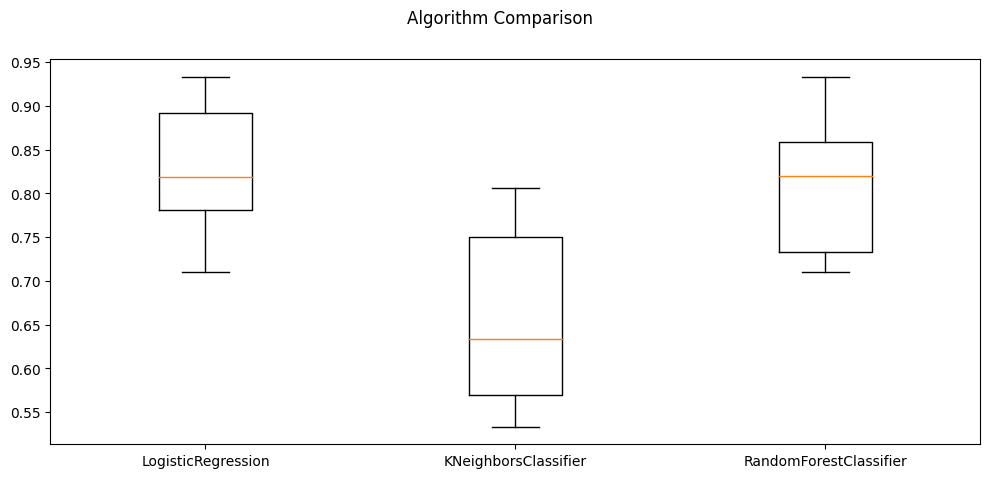

In [30]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [31]:
logistic_model = LogisticRegression()

In [32]:
logistic_model.fit(df.drop('target', axis=1), df['target'])


LogisticRegression()

Checking the model in realtime 

In [35]:
import pandas as pd

# Create an empty dataframe
df2 = pd.DataFrame(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Ask user for input
age = input("Enter age: ")
sex = input("Enter sex: ")
cp = input("Enter cp: ")
trestbps = input("Enter trestbps: ")
chol = input("Enter chol: ")
fbs = input("Enter fbs: ")
restecg = input("Enter restecg: ")
thalach = input("Enter thalach: ")
exang = input("Enter exang: ")
oldpeak = input("Enter oldpeak: ")
slope = input("Enter slope: ")
ca = input("Enter ca: ")
thal = input("Enter thal: ")

# Add user input to the dataframe
df2 = df2.append({'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol, 'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang, 'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal}, ignore_index=True)

# Display the dataframe
print(df2)

  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
0  29   1  3      145  233   1       0     150     0     2.3     0  0    1


In [36]:
review=logistic_model.predict(df2)


In [37]:
print(' predicted chance for Given person is--',review)


 predicted chance for Given person is-- [1]


In [39]:
import pandas as pd

# Create an empty dataframe
df3 = pd.DataFrame(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Ask user for input
age = input("Enter age: ")
sex = input("Enter sex: ")
cp = input("Enter cp: ")
trestbps = input("Enter trestbps: ")
chol = input("Enter chol: ")
fbs = input("Enter fbs: ")
restecg = input("Enter restecg: ")
thalach = input("Enter thalach: ")
exang = input("Enter exang: ")
oldpeak = input("Enter oldpeak: ")
slope = input("Enter slope: ")
ca = input("Enter ca: ")
thal = input("Enter thal: ")

# Add user input to the dataframe
df3 = df3.append({'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol, 'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang, 'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal}, ignore_index=True)

# Display the dataframe
print(df3)

  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
0  57   0  0      140  241   0       1     123     1     0.2     1  0    3


In [40]:
review1=logistic_model.predict(df3)


In [41]:
print(' predicted chance for Given person is--',review1)


 predicted chance for Given person is-- [0]
